# ALY 6110 Data Management and Big Data
## Final Project - Suicide Rate Analysis
### Group member: Yihong Qiu, Yue Liu


Proposal: 

●	Has the suicide rate decreased in recent years?

●	Which countries have high or low suicide rates in comparison, and what causes them to become prominent countries?

●	Regarding the suicide cases of teenagers 13 to 19 years old, what are their trends in gender or country over time?

●	Why do men have more suicides than women in most countries? Are there any countries where women have more suicides than men?


Assignment Summary:

Begin the analysis of your big data set by completing a basic analysis with an associated dashboard. To do this, 

●	Analyze the data for clustering, correlations and patterns that will assist you in answering your initial real-world question or solution. 

●	Using R, Python, Tableau, or other tool to create a basic dashboard for this data that will allow a user to see these attributes of the data. 

●	The Dashboard should contain graphical elements that supports your interpretation of the patterns, clustering and correlations you have found in the data. 

●	Identify three insights based on the data (consider how data is clustered, correlations between data or other patterns in the data). Provide an overview and purpose of each element of the dashboard that you include. This information should reflect the work you did in your analysis.

This assignment should be no more than 3-5 pages in length. Submit screenshots of your preliminary dashboard within the document.

Submit this assignment in Module 4. If you are completing the project as a group, only 1 submission per group is required.

Kaggle link: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


### Install Packages

In [104]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model

### Read Data

In [105]:
df = pd.read_csv('master.csv')

In [106]:
df.shape

(27820, 12)

In [107]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [108]:
df.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [109]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [110]:
df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [111]:
df['gdp_for_year'] = df[' gdp_for_year ($) '].str.replace(',', '').astype(int)

In [112]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000,2.782000e+04
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414,4.455810e+11
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472,1.453610e+12
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000,4.691962e+07
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000,8.985353e+09
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000,4.811469e+10
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000,2.602024e+11
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000,1.812071e+13


### Encoding

In [113]:
#df.columns

In [114]:
df=df.drop(['country', 'country-year', ' gdp_for_year ($) '],axis=1)

In [115]:
#df

In [116]:
X_cat = df.copy()
X_cat = df.select_dtypes(include=['object'])
X_enc = X_cat.copy()
print(X_enc)

          sex          age       generation
0        male  15-24 years     Generation X
1        male  35-54 years           Silent
2      female  15-24 years     Generation X
3        male    75+ years  G.I. Generation
4        male  25-34 years          Boomers
...       ...          ...              ...
27815  female  35-54 years     Generation X
27816  female    75+ years           Silent
27817    male   5-14 years     Generation Z
27818  female   5-14 years     Generation Z
27819  female  55-74 years          Boomers

[27820 rows x 3 columns]


In [117]:
X_enc = pd.get_dummies(X_enc, columns=['sex','age','generation'])
df = df.drop(['sex','age','generation'],axis=1)

In [118]:
df = pd.concat([df,X_enc], axis=1)
df.head()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),gdp_for_year,sex_female,sex_male,age_15-24 years,...,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,NaN,796,2156624900,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,NaN,796,2156624900,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,NaN,796,2156624900,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,NaN,796,2156624900,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,1987,9,274300,3.28,NaN,796,2156624900,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [119]:
df.shape

(27820, 21)

### Correlation Matrix

In [123]:
corrMatrix = df.corr()
#print (corrMatrix)

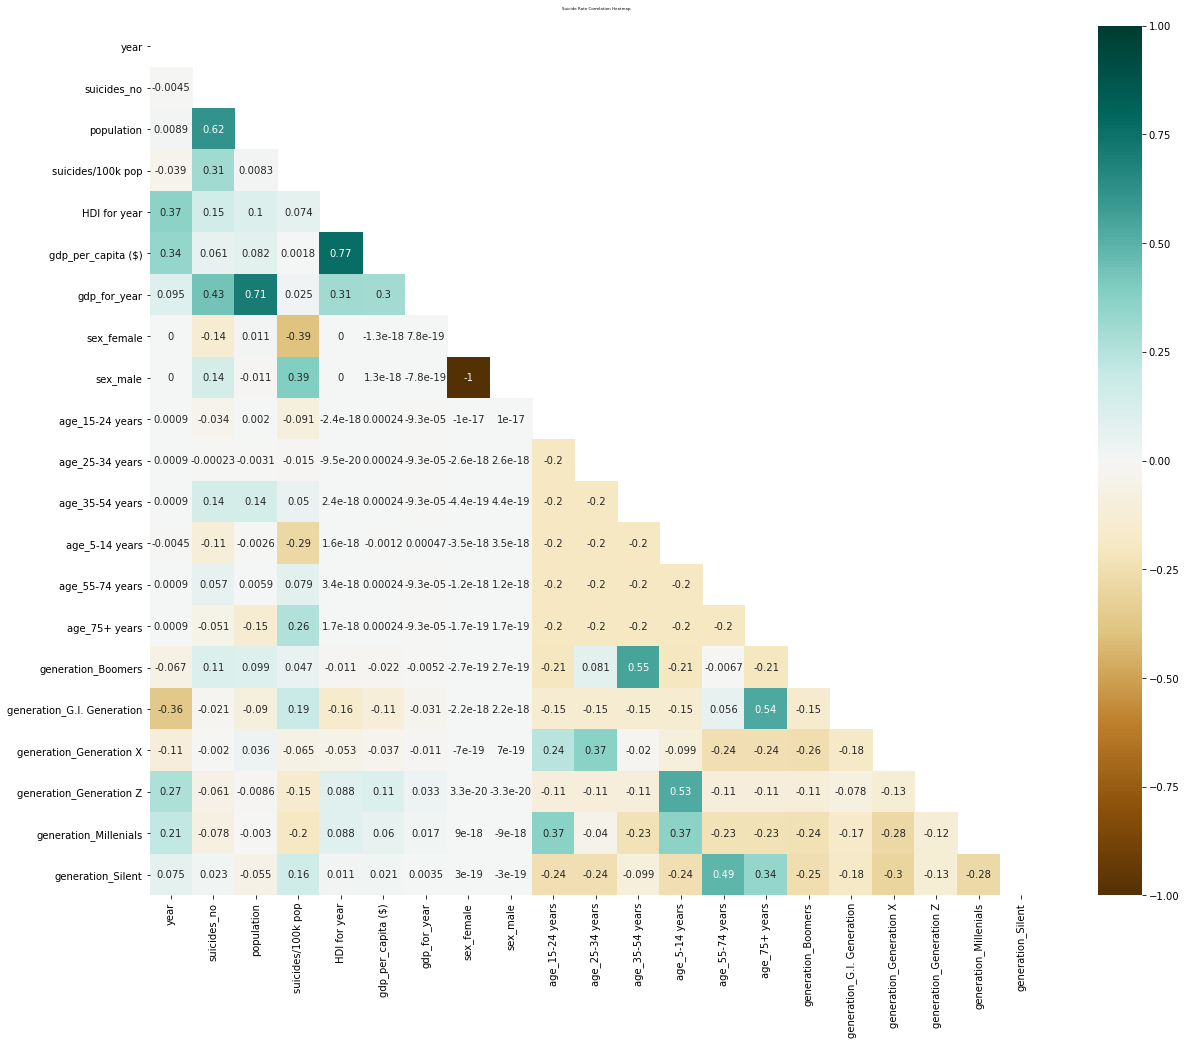

In [134]:
plt.figure(figsize=(20, 16))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corrMatrix, dtype=np.bool))
heatmap = sns.heatmap(corrMatrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Suicide Rate Correlation Heatmap', fontdict={'fontsize':4}, pad=16);

### Multiple Linear Regreesion

In [150]:
x = df[['year', 'suicides_no', 'population','gdp_per_capita ($)', 'gdp_for_year', 'sex_female',
       'sex_male', 'age_15-24 years', 'age_25-34 years', 'age_35-54 years','age_5-14 years', 'age_55-74 years', 
        'age_75+ years','generation_Boomers', 'generation_G.I. Generation','generation_Generation X', 
        'generation_Generation Z','generation_Millenials', 'generation_Silent']]
y = df['suicides/100k pop']

In [151]:
LR = linear_model.LinearRegression()
LR.fit(x, y)

LinearRegression()

In [171]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [172]:
vif.round(1)

,VIF Factor,features
0,0.0,year
1,1.7,suicides_no
2,2.9,population
3,1.2,gdp_per_capita ($)
4,0.0,gdp_for_year
5,1.0,sex_male
6,1.3,age_25-34 years
7,1.3,age_5-14 years
8,1.3,age_55-74 years
9,1.3,age_75+ years


In [166]:
df2 = df.drop(['sex_female','age_15-24 years','age_35-54 years',
        'generation_Boomers', 'generation_G.I. Generation','generation_Generation X', 
        'generation_Generation Z','generation_Millenials', 'generation_Silent','HDI for year'],axis=1)

In [168]:
df2.columns

Index(['year', 'suicides_no', 'population', 'suicides/100k pop',
       'gdp_per_capita ($)', 'gdp_for_year', 'sex_male', 'age_25-34 years',
       'age_5-14 years', 'age_55-74 years', 'age_75+ years'],
      dtype='object')

In [169]:
x = df2[['year', 'suicides_no', 'population', 
       'gdp_per_capita ($)', 'gdp_for_year', 'sex_male', 'age_25-34 years',
       'age_5-14 years', 'age_55-74 years', 'age_75+ years']]
y = df2['suicides/100k pop']

In [170]:
OLS = sm.OLS(y, x)
results = OLS.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     1727.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:39:06   Log-Likelihood:            -1.1516e+05
No. Observations:               27820   AIC:                         2.303e+05
Df Residuals:                   27810   BIC:                         2.304e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
year                   0.0025      0

In [173]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  year                  2.508006e-03
suicides_no           7.328252e-03
population           -7.946412e-07
gdp_per_capita ($)   -4.760351e-06
gdp_for_year         -8.738346e-14
sex_male              1.287026e+01
age_25-34 years       5.219700e-01
age_5-14 years       -9.350294e+00
age_55-74 years       3.709316e+00
age_75+ years         1.204517e+01
dtype: float64
R2:  0.3585034162764402
